In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LassoCV,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
from sklearn.datasets import load_boston

data=load_boston(return_X_y=False)

C:\Users\Alina\anaconda3\envs\tesnorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

In [3]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df['Target']=data.target

In [4]:
X= df.drop(columns='Target')
Y=df['Target']

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=91)

In [33]:
coeff=[]
r2_scores=[]

alpha=[0,0.01,0.1,10]

for i in alpha:
    Ls=Lasso(alpha=i)
    Ls.fit(X_train,y_train)
    coeff.append(Ls.coef_.tolist())
    print("The coefficient for i={} is {}\n".format(i, coeff))
    y_pred = Ls.predict(X_test)
    r2_scores=[].append(r2_score(y_test,y_pred))
    print("The r2_scores for i={} is {}\n".format(i, r2_score(y_test,y_pred)))
    



The coefficient for i=0 is [[69.18301498086518, 83.51117800253085, 80.30041805563876, 49.23102003726183, 74.28101377294402, 15.313873215586414, 26.608194236673732, 3.4346823907854898, 14.012210868533845, 20.602693963106333]]

The r2_scores for i=0 is 0.999994132250628

The coefficient for i=0.01 is [[69.18301498086518, 83.51117800253085, 80.30041805563876, 49.23102003726183, 74.28101377294402, 15.313873215586414, 26.608194236673732, 3.4346823907854898, 14.012210868533845, 20.602693963106333], [69.17463910717767, 83.51010492398416, 80.29349910664916, 49.2146066505015, 74.2668407465667, 15.308081609792598, 26.60212349864545, 3.4211676444329884, 14.003480657619349, 20.595664478394887]]

The r2_scores for i=0.01 is 0.999993989029607

The coefficient for i=0.1 is [[69.18301498086518, 83.51117800253085, 80.30041805563876, 49.23102003726183, 74.28101377294402, 15.313873215586414, 26.608194236673732, 3.4346823907854898, 14.012210868533845, 20.602693963106333], [69.17463910717767, 83.5101049239

C:\Users\Alina\AppData\Local\Temp\ipykernel_23456\4118659743.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  Ls.fit(X_train,y_train)
C:\Users\Alina\anaconda3\envs\tesnorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


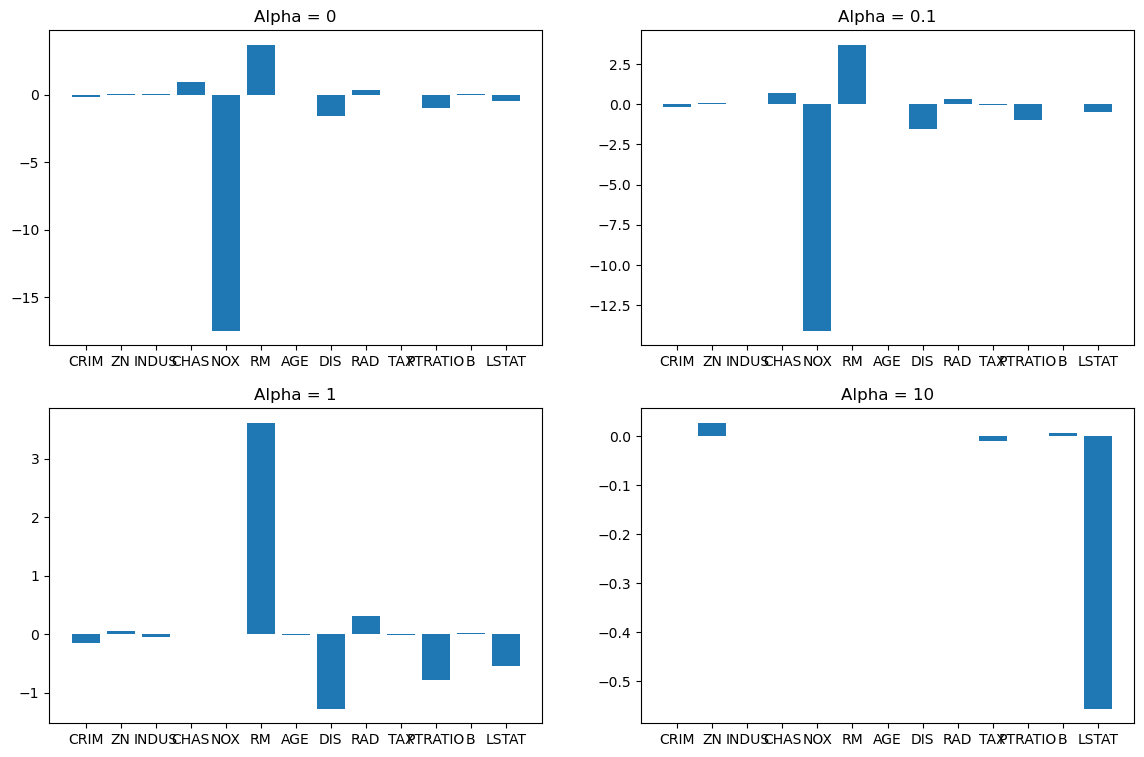

In [7]:

plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coeff[0])
plt.title('Alpha = 0')

plt.subplot(222)
plt.bar(data.feature_names,coeff[1])
plt.title('Alpha = 0.1')

plt.subplot(223)
plt.bar(data.feature_names,coeff[2])
plt.title('Alpha = 1')

plt.subplot(224)
plt.bar(data.feature_names,coeff[3])
plt.title('Alpha = 10')


plt.show()


Details are displayed for alpha=0.01
   Features  Coefficients
0      CRIM     -0.158727
1        ZN      0.050272
2     INDUS      0.012973
3      CHAS      0.694870
4       NOX    -14.108305
5        RM      3.715922
6       AGE     -0.001879
7       DIS     -1.531960
8       RAD      0.336948
9       TAX     -0.014863
10  PTRATIO     -0.961775
11        B      0.011627
12    LSTAT     -0.509208 

Details are displayed for alpha=5.06040404040404
   Features  Coefficients
0      CRIM     -0.000000
1        ZN      0.037381
2     INDUS     -0.000000
3      CHAS      0.000000
4       NOX      0.000000
5        RM      0.000000
6       AGE      0.030790
7       DIS     -0.000000
8       RAD      0.000000
9       TAX     -0.008901
10  PTRATIO     -0.000000
11        B      0.005969
12    LSTAT     -0.731509 

Details are displayed for alpha=10.11080808080808
   Features  Coefficients
0      CRIM     -0.000000
1        ZN      0.027367
2     INDUS     -0.000000
3      CHAS      0.000000
4 

   Features  Coefficients
0      CRIM     -0.000000
1        ZN      0.000000
2     INDUS     -0.000000
3      CHAS      0.000000
4       NOX     -0.000000
5        RM      0.000000
6       AGE     -0.000000
7       DIS      0.000000
8       RAD     -0.000000
9       TAX     -0.023146
10  PTRATIO     -0.000000
11        B      0.002495
12    LSTAT     -0.000000 

Details are displayed for alpha=106.06848484848486
   Features  Coefficients
0      CRIM     -0.000000
1        ZN      0.000000
2     INDUS     -0.000000
3      CHAS      0.000000
4       NOX     -0.000000
5        RM      0.000000
6       AGE     -0.000000
7       DIS      0.000000
8       RAD     -0.000000
9       TAX     -0.023102
10  PTRATIO     -0.000000
11        B      0.001900
12    LSTAT     -0.000000 

Details are displayed for alpha=111.11888888888889
   Features  Coefficients
0      CRIM     -0.000000
1        ZN      0.000000
2     INDUS     -0.000000
3      CHAS      0.000000
4       NOX     -0.000000
5        R

   Features  Coefficients
0      CRIM     -0.000000
1        ZN      0.000000
2     INDUS     -0.000000
3      CHAS      0.000000
4       NOX     -0.000000
5        RM      0.000000
6       AGE     -0.000000
7       DIS      0.000000
8       RAD     -0.000000
9       TAX     -0.019191
10  PTRATIO     -0.000000
11        B      0.000000
12    LSTAT     -0.000000 

Details are displayed for alpha=232.32858585858585
   Features  Coefficients
0      CRIM      -0.00000
1        ZN       0.00000
2     INDUS      -0.00000
3      CHAS       0.00000
4       NOX      -0.00000
5        RM       0.00000
6       AGE      -0.00000
7       DIS       0.00000
8       RAD      -0.00000
9       TAX      -0.01901
10  PTRATIO      -0.00000
11        B       0.00000
12    LSTAT      -0.00000 

Details are displayed for alpha=237.3789898989899
   Features  Coefficients
0      CRIM     -0.000000
1        ZN      0.000000
2     INDUS     -0.000000
3      CHAS      0.000000
4       NOX     -0.000000
5        RM

   Features  Coefficients
0      CRIM     -0.000000
1        ZN      0.000000
2     INDUS     -0.000000
3      CHAS      0.000000
4       NOX     -0.000000
5        RM      0.000000
6       AGE     -0.000000
7       DIS      0.000000
8       RAD     -0.000000
9       TAX     -0.014846
10  PTRATIO     -0.000000
11        B      0.000000
12    LSTAT     -0.000000 

Details are displayed for alpha=353.53828282828283
   Features  Coefficients
0      CRIM     -0.000000
1        ZN      0.000000
2     INDUS     -0.000000
3      CHAS      0.000000
4       NOX     -0.000000
5        RM      0.000000
6       AGE     -0.000000
7       DIS      0.000000
8       RAD     -0.000000
9       TAX     -0.014665
10  PTRATIO     -0.000000
11        B      0.000000
12    LSTAT     -0.000000 

Details are displayed for alpha=358.58868686868686
   Features  Coefficients
0      CRIM     -0.000000
1        ZN      0.000000
2     INDUS     -0.000000
3      CHAS      0.000000
4       NOX     -0.000000
5        R

   Features  Coefficients
0      CRIM     -0.000000
1        ZN      0.000000
2     INDUS     -0.000000
3      CHAS      0.000000
4       NOX     -0.000000
5        RM      0.000000
6       AGE     -0.000000
7       DIS      0.000000
8       RAD     -0.000000
9       TAX     -0.010682
10  PTRATIO     -0.000000
11        B      0.000000
12    LSTAT     -0.000000 

Details are displayed for alpha=469.69757575757575
   Features  Coefficients
0      CRIM     -0.000000
1        ZN      0.000000
2     INDUS     -0.000000
3      CHAS      0.000000
4       NOX     -0.000000
5        RM      0.000000
6       AGE     -0.000000
7       DIS      0.000000
8       RAD     -0.000000
9       TAX     -0.010501
10  PTRATIO     -0.000000
11        B      0.000000
12    LSTAT     -0.000000 

Details are displayed for alpha=474.7479797979798
   Features  Coefficients
0      CRIM      -0.00000
1        ZN       0.00000
2     INDUS      -0.00000
3      CHAS       0.00000
4       NOX      -0.00000
5        RM

ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

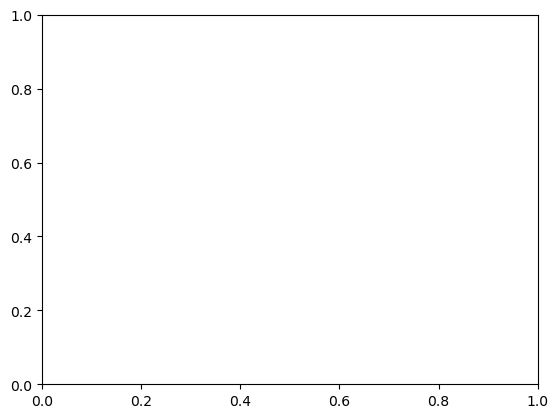

In [25]:
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coeff = []

for a in alphas:
    print('Details are displayed for alpha={}'.format(a))
 
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coeff.append(Ls.coef_.tolist())
    # Print the coefficients of the model
    coefficients = pd.DataFrame({'Features': X_train.columns, 'Coefficients': lasso.coef_})
    print(coefficients,'\n')
    

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [26]:
input_array = np.array(coeff)

coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
alpha,,,,,,,,,,,,,
0.010000,-0.0,0.027301,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.010482,-0.0,0.006824,-0.557055
5.060404,-0.0,0.027301,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.010482,-0.0,0.006824,-0.557055
10.110808,-0.0,0.027301,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.010482,-0.0,0.006824,-0.557055
15.161212,-0.0,0.027301,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.010482,-0.0,0.006824,-0.557055
20.211616,-0.0,0.027301,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.010482,-0.0,0.006824,-0.557055
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479.798384,-0.0,0.027301,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.010482,-0.0,0.006824,-0.557055
484.848788,-0.0,0.027301,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.010482,-0.0,0.006824,-0.557055
489.899192,-0.0,0.027301,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.010482,-0.0,0.006824,-0.557055
